In [80]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import boto3
s3_client = boto3.client("s3")

In [86]:
bucket = "niks-audio-in"
input_audio_file_name = "sample.wav"
s3_client.download_file(bucket, f"230617 Premiere Landestheater Menschenfeind.wav", input_audio_file_name )

with open(input_audio_file_name, "rb") as file:
    wav_file_read = file.read()

In [21]:
a = tf.constant([[1,2,3]])
b = tf.constant([[0],[0],[0]])
c = tf.constant([[1,1,1]])

In [25]:
print(a)
print(b)
print(a+b)

tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)
tf.Tensor(
[[0]
 [0]
 [0]], shape=(3, 1), dtype=int32)
tf.Tensor(
[[1 2 3]
 [1 2 3]
 [1 2 3]], shape=(3, 3), dtype=int32)


In [26]:
print(a@tf.transpose(c))

tf.Tensor([[6]], shape=(1, 1), dtype=int32)


In [27]:
c

<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[1, 1, 1]], dtype=int32)>

In [33]:
tf.keras.activations.gelu(
    0.5, approximate=False
).numpy()

0.34573123

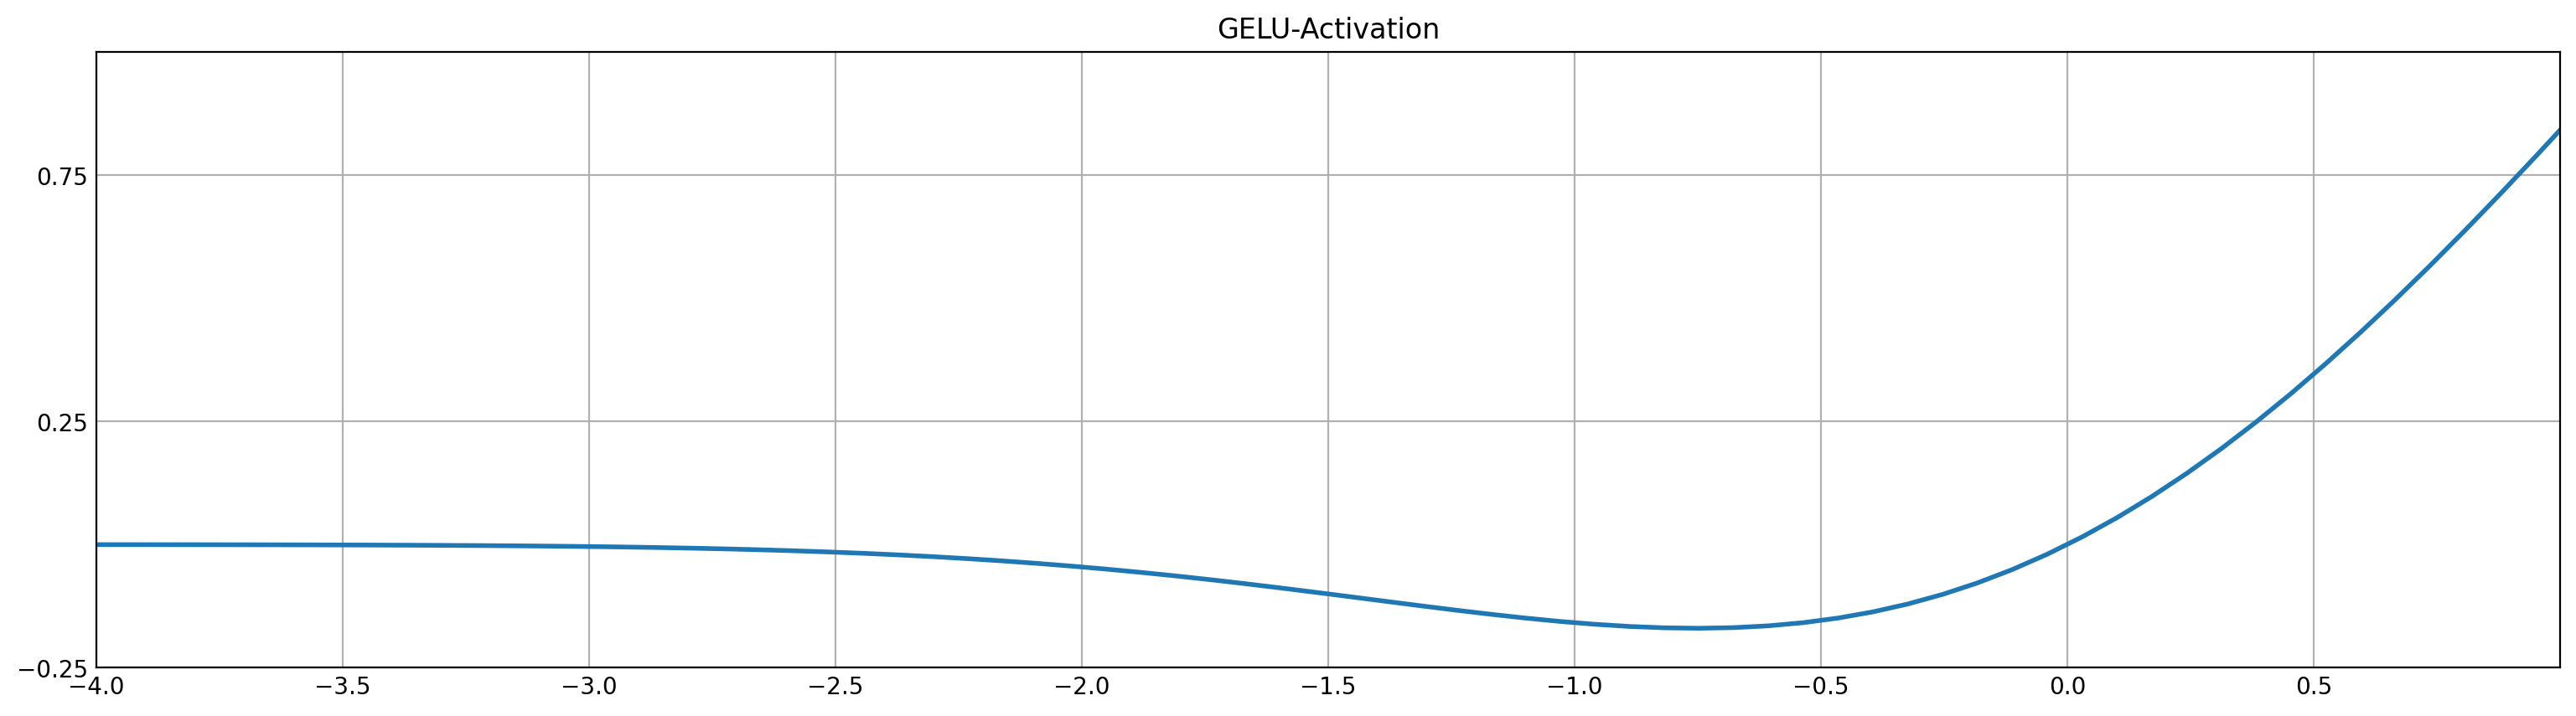

In [83]:
plt.style.use('_mpl-gallery')
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [15, 15]

# make data
x = np.linspace(-4, 3, 100)
y = tf.keras.activations.gelu(x, approximate=False).numpy()


# plot
fig, ax = plt.subplots()
plt.title('GELU-Activation')
ax.plot(x, y, linewidth=2.0)

ax.set(xlim=(-4, 1.0), xticks=np.arange(-4,1, 0.5),
       ylim=(-.25, 1.0), yticks=np.arange(-.25,1, 0.5))

plt.gca().set_aspect('equal')

plt.show()

In [84]:
!pip install librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.7/253.7 kB 2.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.0/531.0 kB 5.8 MB/s eta 0:00:0000:01

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [85]:
import librosa

In [141]:
y,sr = librosa.load('S_2023_10_11T16_59_45_035Z.orig.wav', sr=16000,duration=20.0)

In [142]:
print(y.size)
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
M = librosa.feature.melspectrogram(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)

320000


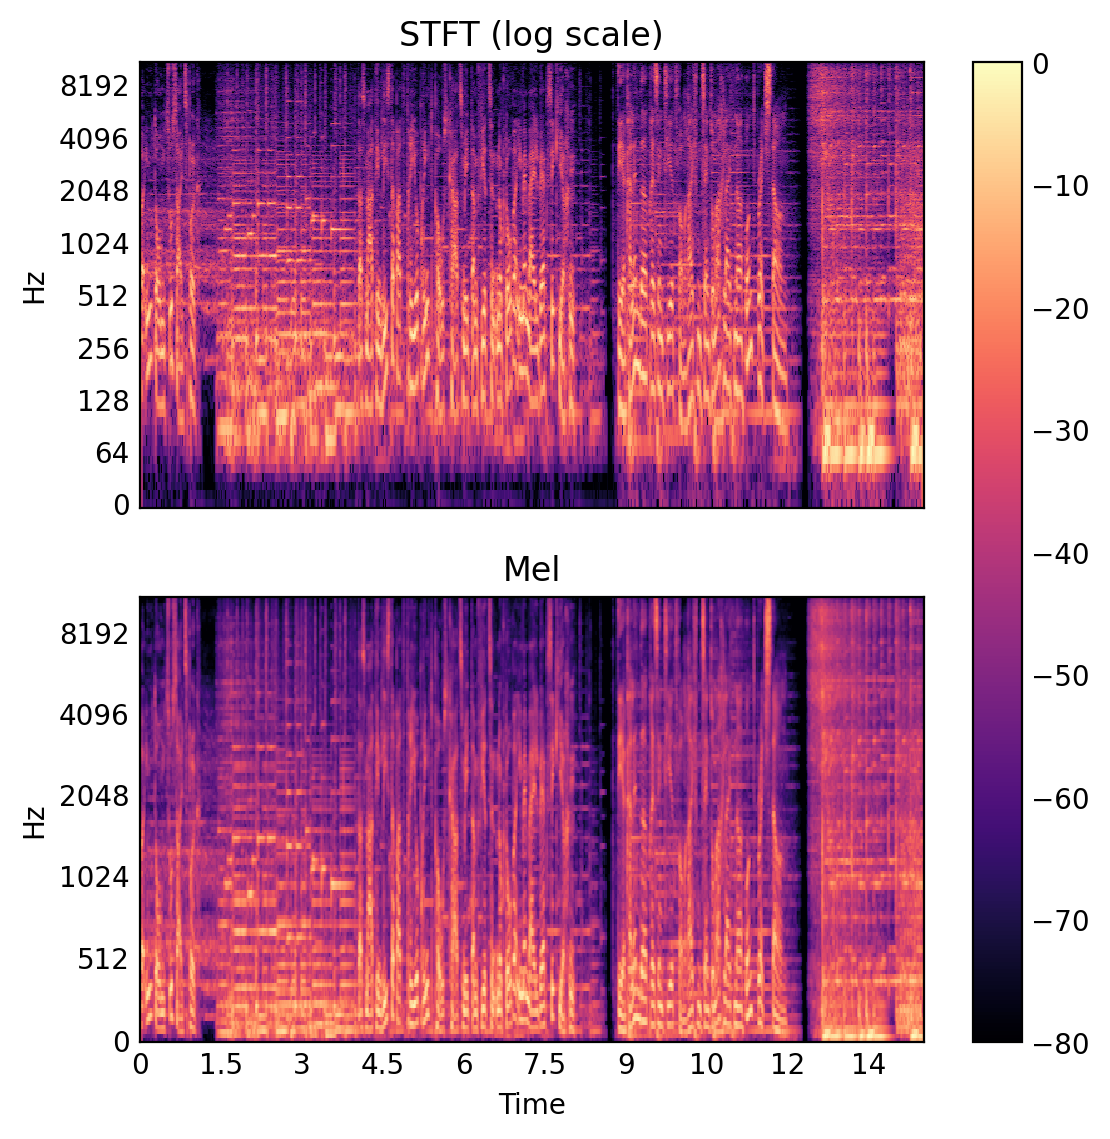

In [143]:
# Construct a subplot grid with 3 rows and 1 column, sharing the x-axis)
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)

# On the first subplot, show the original spectrogram
img1 = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='STFT (log scale)')

# On the second subplot, show the mel spectrogram
img2 = librosa.display.specshow(M_db, x_axis='time', y_axis='mel', ax=ax[1])
ax[1].set(title='Mel')

# To eliminate redundant axis labels, we'll use "label_outer" on all subplots:
for ax_i in ax:
    ax_i.label_outer()

# And we can share colorbars:
fig.colorbar(img1, ax=[ax[0], ax[1]])
